In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
KNOWN_DIR = "/content/drive/MyDrive/selena_gomez"
TEST_IMAGE = "/content/drive/MyDrive/selena_test/test_lighting_and_profile.jpg"

In [ ]:
# DeepFace
from deepface import DeepFace
import numpy as np
import cv2, os

25-11-17 06:42:58 - Directory /root/.deepface has been created
25-11-17 06:42:58 - Directory /root/.deepface/weights has been created


In [ ]:
# Собираем эмбеддинги известного человека (папка содержит 14 снимков лица селены гомез с различных ракурсов)
known_embeddings = []
for fname in os.listdir(KNOWN_DIR):
    path = os.path.join(KNOWN_DIR, fname)
    try:
        reps = DeepFace.represent(img_path=path, model_name="Facenet512", enforce_detection=False)
        if isinstance(reps, list):
            for r in reps: known_embeddings.append(np.array(r['embedding']))
        else:
            known_embeddings.append(np.array(reps['embedding']))
    except:
        pass

centroid = np.mean(known_embeddings, axis=0)

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5


25-11-17 07:27:26 - 🔗 facenet512_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5 to /root/.deepface/weights/facenet512_weights.h5...


100%|██████████| 95.0M/95.0M [00:00<00:00, 387MB/s]


In [ ]:
# Эмбеддинг тестового фото
test_reps = DeepFace.represent(img_path=TEST_IMAGE, model_name="Facenet512", enforce_detection=False)
test_emb = np.array(test_reps[0]['embedding'])

In [ ]:
def cosine_distance(a, b):
    return 1 - np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [ ]:
# Косинусная дистанция для фото без макияжа (test_no_make_up.jpg)
def cosine_distance(a, b):
    return 1 - np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

df_distance = cosine_distance(test_emb, centroid)
print("DeepFace distance:", df_distance)

if df_distance < 0.4:
    print("DeepFace считает: лицо совпадает")
else:
    print("DeepFace считает: лицо другое")

DeepFace distance: 0.21504888339866923
DeepFace считает: лицо совпадает


In [ ]:
# Косинусная дистанция для фото с рукой (test_with_hand.jpg)

df_distance = cosine_distance(test_emb, centroid)
print("DeepFace distance:", df_distance)

if df_distance < 0.4:
    print("DeepFace считает: лицо совпадает")
else:
    print("DeepFace считает: лицо другое")

DeepFace distance: 0.33191572949497383
DeepFace считает: лицо совпадает


In [ ]:
# Косинусная дистанция для фото с ярким солнечным светом + лицо повёрнуто в профиль (test_lighting_and_profile.jpg)

df_distance = cosine_distance(test_emb, centroid)
print("DeepFace distance:", df_distance)

if df_distance < 0.4:
    print("DeepFace считает: лицо совпадает")
else:
    print("DeepFace считает: лицо другое")

DeepFace distance: 0.715314610270488
DeepFace считает: лицо другое


In [ ]:
# Косинусная дистанция для фото, на котором есть ещё один человек (test_with_person.jpg)

df_distance = cosine_distance(test_emb, centroid)
print("DeepFace distance:", df_distance)

if df_distance < 0.4:
    print("DeepFace считает: лицо совпадает")
else:
    print("DeepFace считает: лицо другое")

DeepFace distance: 0.18043331070700863
DeepFace считает: лицо совпадает


In [ ]:
# Косинусная дистанция для фото другого человека (taylor_swift.jpg)

df_distance = cosine_distance(test_emb, centroid)
print("DeepFace distance:", df_distance)

if df_distance < 0.4:
    print("DeepFace считает: лицо совпадает")
else:
    print("DeepFace считает: лицо другое")

DeepFace distance: 0.8220535231156774
DeepFace считает: лицо другое


Вывод по DeepFace: справился со всеми задачами, кроме фото, где был очень яркий свет (часть лица засвечена), у девушки закрыты глаза, и она в профиль. Я бы её там и сама не узнала)))

In [8]:
# face_recognition
import face_recognition

In [11]:
known_encodings = []
for fname in os.listdir(KNOWN_DIR):
    img = face_recognition.load_image_file(os.path.join(KNOWN_DIR, fname))
    encs = face_recognition.face_encodings(img)
    known_encodings.extend(encs)

In [38]:
test_img = face_recognition.load_image_file(TEST_IMAGE)
test_encs = face_recognition.face_encodings(test_img)

In [13]:
# тест 1 (фото другого человека harry_styles.jpg)
fr_results = []
for enc in test_encs:
    distances = face_recognition.face_distance(known_encodings, enc)
    fr_results.append(min(distances))

print("face_recognition min distance:", min(fr_results))

if min(fr_results) < 0.6:
    print("face_recognition считает: лицо совпадает")
else:
    print("face_recognition считает: лицо другое")

face_recognition min distance: 0.7859471557275713
face_recognition считает: лицо другое


In [18]:
# тест 2 (фото правильного человека без макияжа test_no_make_up.jpg)
fr_results = []
for enc in test_encs:
    distances = face_recognition.face_distance(known_encodings, enc)
    fr_results.append(min(distances))

print("face_recognition min distance:", min(fr_results))

if min(fr_results) < 0.6:
    print("face_recognition считает: лицо совпадает")
else:
    print("face_recognition считает: лицо другое")

face_recognition min distance: 0.4589016976734677
face_recognition считает: лицо совпадает


In [21]:
# тест 3 (фото правильного человека c рукой test_with_hand.jpg)
fr_results = []
for enc in test_encs:
    distances = face_recognition.face_distance(known_encodings, enc)
    fr_results.append(min(distances))

print("face_recognition min distance:", min(fr_results))

if min(fr_results) < 0.6:
    print("face_recognition считает: лицо совпадает")
else:
    print("face_recognition считает: лицо другое")

face_recognition min distance: 0.41254330023364233
face_recognition считает: лицо совпадает


In [39]:
# тест 4 (фото правильного человека c засвечиванием и в профиль test_lighting_and_profile.jpg)
fr_results = []
for enc in test_encs:
    distances = face_recognition.face_distance(known_encodings, enc)
    fr_results.append(min(distances))

print("face_recognition min distance:", min(fr_results))

if min(fr_results) < 0.6:
    print("face_recognition считает: лицо совпадает")
else:
    print("face_recognition считает: лицо другое")

ValueError: min() iterable argument is empty

In [ ]:
# в тесте № 4 не удалось распознать лицо

In [30]:
# тест 5 (фото правильного человека c доп.человеком test_with_person.jpg)
fr_results = []
for enc in test_encs:
    distances = face_recognition.face_distance(known_encodings, enc)
    fr_results.append(min(distances))

print("face_recognition min distance:", min(fr_results))

if min(fr_results) < 0.6:
    print("face_recognition считает: лицо совпадает")
else:
    print("face_recognition считает: лицо другое")

face_recognition min distance: 0.3323837017290252
face_recognition считает: лицо совпадает


In [33]:
# тест 6 (фото другого человека taylor_swift.jpg)
fr_results = []
for enc in test_encs:
    distances = face_recognition.face_distance(known_encodings, enc)
    fr_results.append(min(distances))

print("face_recognition min distance:", min(fr_results))

if min(fr_results) < 0.6:
    print("face_recognition считает: лицо совпадает")
else:
    print("face_recognition считает: лицо другое")

face_recognition min distance: 0.6875410553885183
face_recognition считает: лицо другое


In [36]:
# тест 7 (фото другого человека harry_styles.jpg)
fr_results = []
for enc in test_encs:
    distances = face_recognition.face_distance(known_encodings, enc)
    fr_results.append(min(distances))

print("face_recognition min distance:", min(fr_results))

if min(fr_results) < 0.6:
    print("face_recognition считает: лицо совпадает")
else:
    print("face_recognition считает: лицо другое")

face_recognition min distance: 0.7859471557275713
face_recognition считает: лицо другое


face_recognition тоже отлично справился, за исключением проблемного засвеченного фото, но по нему не судим, там и человеческим глазом тяжело понять

In [ ]:
# OpenCV-решение

In [ ]:
import cv2
import numpy as np
import os

In [ ]:
# Загружаем DNN модель
net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

In [ ]:
def detect_main_face_dnn(path, conf_threshold=0.7):
    img = cv2.imread(path)
    if img is None:
        return None
    h, w = img.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0,
                                 (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()

    max_conf = 0
    best_face = None
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold and confidence > max_conf:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype("int")
            face = img[y1:y2, x1:x2]
            gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, (100,100))
            gray = cv2.equalizeHist(gray)
            best_face = gray
            max_conf = confidence
    return best_face

In [ ]:
# Обучение LBPH на эталонных фото
faces, labels = [], []

for fname in os.listdir(KNOWN_DIR):
    path = os.path.join(KNOWN_DIR, fname)
    face = detect_main_face_dnn(path)
    if face is not None:
        faces.append(face)
        labels.append(0)  # один человек → один label
    else:
        print("Лицо не найдено в:", fname)

print("Эталонных лиц:", len(faces))

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(faces, np.array(labels))

Эталонных лиц: 14


In [ ]:
# Проверка на тестовом фото 1 (test_no_make_up.jpg)
test_face = detect_main_face_dnn(TEST_IMAGE)

if test_face is not None:
    label, confidence = recognizer.predict(test_face)
    verdict = "совпадает" if confidence < 90 else "другое"
    print(f"LBPH+DNN: label={label}, confidence={confidence:.2f} → {verdict}")
else:
    print("Лицо не найдено на тестовом фото")

LBPH+DNN: label=0, confidence=114.72 → другое


In [ ]:
# Проверка на тестовом фото 2 (test_with_hand.jpg)
test_face = detect_main_face_dnn(TEST_IMAGE)

if test_face is not None:
    label, confidence = recognizer.predict(test_face)
    verdict = "совпадает" if confidence < 90 else "другое"
    print(f"LBPH+DNN: label={label}, confidence={confidence:.2f} → {verdict}")
else:
    print("Лицо не найдено на тестовом фото")

LBPH+DNN: label=0, confidence=87.48 → совпадает


In [ ]:
# Проверка на тестовом фото 3 (test_lighting_and_profile.jpg)
test_face = detect_main_face_dnn(TEST_IMAGE)

if test_face is not None:
    label, confidence = recognizer.predict(test_face)
    verdict = "совпадает" if confidence < 90 else "другое"
    print(f"LBPH+DNN: label={label}, confidence={confidence:.2f} → {verdict}")
else:
    print("Лицо не найдено на тестовом фото")

LBPH+DNN: label=0, confidence=117.03 → другое


In [ ]:
# Проверка на тестовом фото 4 (test_with_person.jpg)
test_face = detect_main_face_dnn(TEST_IMAGE)

if test_face is not None:
    label, confidence = recognizer.predict(test_face)
    verdict = "совпадает" if confidence < 90 else "другое"
    print(f"LBPH+DNN: label={label}, confidence={confidence:.2f} → {verdict}")
else:
    print("Лицо не найдено на тестовом фото")

LBPH+DNN: label=0, confidence=100.74 → другое


In [ ]:
# Проверка на тестовом фото 5 (taylor_swift.jpg)
test_face = detect_main_face_dnn(TEST_IMAGE)

if test_face is not None:
    label, confidence = recognizer.predict(test_face)
    verdict = "совпадает" if confidence < 90 else "другое"
    print(f"LBPH+DNN: label={label}, confidence={confidence:.2f} → {verdict}")
else:
    print("Лицо не найдено на тестовом фото")

LBPH+DNN: label=0, confidence=104.54 → другое


In [ ]:
# Проверка на тестовом фото 6 (harry_styles.jpg)
test_face = detect_main_face_dnn(TEST_IMAGE)

if test_face is not None:
    label, confidence = recognizer.predict(test_face)
    verdict = "совпадает" if confidence < 90 else "другое"
    print(f"LBPH+DNN: label={label}, confidence={confidence:.2f} → {verdict}")
else:
    print("Лицо не найдено на тестовом фото")

LBPH+DNN: label=0, confidence=95.68 → другое


In [ ]:
from google.colab.patches import cv2_imshow

def show_detected_faces(path, conf_threshold=0.7):
    img = cv2.imread(path)
    h, w = img.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0,
                                 (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype("int")
            face = img[y1:y2, x1:x2]
            face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            face_gray = cv2.resize(face_gray, (100,100))
            cv2_imshow(face_gray)   # выводим кроп


Файл: 1.jpg


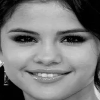

Файл: 2.jpg


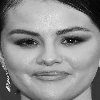

Файл: 3.jpg


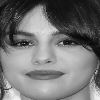

Файл: 4.jpg


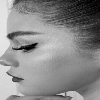

Файл: 5.jpg


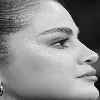

Файл: 6.jpg


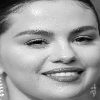

Файл: 7.jpg


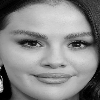

Файл: 8.jpg


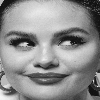

Файл: 9.jpg


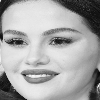

Файл: 10.jpg


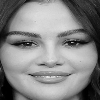

Файл: 11.jpg


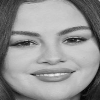

Файл: 12.jpg


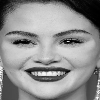

Файл: 13.jpg


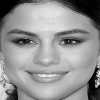

Файл: 14.jpg


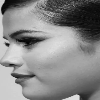

In [ ]:
# проверим кропы
for fname in os.listdir(KNOWN_DIR):
    print("Файл:", fname)
    show_detected_faces(os.path.join(KNOWN_DIR, fname))

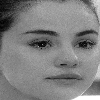

In [ ]:
show_detected_faces(TEST_IMAGE)

DNN мы использовали для детекции лиц, чтобы вырезать из фото лицо, а не стол, стул и фон. Со своей задачей он хорошо справился.

Дальше работает распознаватель LBPH. Он должен определить, нужный ли человек на фото.
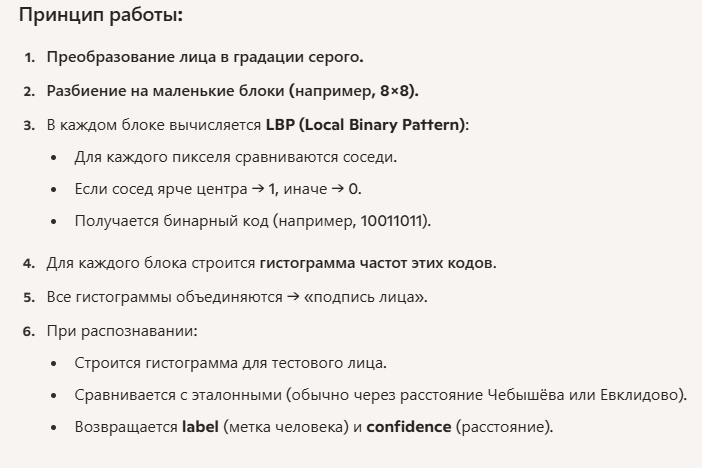

Из этого описания ясно, почему он может быть более уверенным в чужих людях, чем в человеке с обучающих фото. Он сравнивает пиксели, то есть фото в профиль, повернутое лицо, борода, очки сразу же делают маловероятным распознавание. В то время как если совсем другой человек при похожем освещении, лицо расположено так же как на каком-то из обюучающих фото, метод его пропустит как своего.

LBPH — это классический метод, он хорошо работает на «паспортных» фото (анфас, одинаковое освещение). Но в реальных условиях он часто путается. + этому методу нужно очень большое число обучающих фото, в то время как DeepFace и face_recognition отлично справились даже с 14-ью фото.

Сравнивая OpenCV, face_recognition и DeepFace выбор однозначно в сторону DeepFace и face_recognition (выигрывают по требуемому объёму эталонных фото, качеству распознавания даже при отличных позах, помехах, наличии других людей).

face_recognition и DeepFace - это специальные решения, заточенные под распознавание лиц, в то время, как OpenCV можно использовать для этой задачи, но это требует гораздо больших усилий и точность сильно ниже (как видим, в случае с 14 фото, почти нулевая..).